In [1]:
import os
from IPython import get_ipython
ipython = get_ipython()

In [2]:
ipython.magic("load_ext rpy2.ipython")
string_libraries = """R library(hsi); library(raster); library(usethis);
                        library(devtools); library(rgdal); library(future);
                        library(furrr);
                   """
ipython.magic(string_libraries)

R[write to console]: Loading required package: sp

R[write to console]: rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: /usr/share/proj
Linking to sp version:1.4-2
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.

R[write to console]: 
Attaching package: ‘future’


R[write to console]: The following object is masked from ‘package:raster’:

    values




In [8]:
#
ipython.magic("load_ext rpy2.ipython")
#

string_data_input = """R poncaloc <- rgdal::readOGR("/shared_volume/Ponca_DV_loc/","poncadav2");
                         ponca_mask <- raster::raster("/shared_volume/Ponca_DV/poncamask.tif")
                    """
ipython.magic(string_data_input)

#
poncaloc = ipython.magic("Rget poncaloc")
ponca_mask = ipython.magic("Rget ponca_mask")

print(poncaloc)
print(ponca_mask)
#

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
OGR data source with driver: ESRI Shapefile 
Source: "/shared_volume/Ponca_DV_loc", layer: "poncadav2"
with 106 features
It has 4 fields
Integer64 fields read as strings:  Year 
class       : SpatialPointsDataFrame 
features    : 106 
extent      : -105.037, -87.1511, 15.9675, 23.05833  (xmin, xmax, ymin, ymax)
crs         : +proj=longlat +datum=WGS84 +no_defs 
variables   : 4
names       :       Especie,     Latitud, Longitud, Year 
min values  : Panthera onca,     15.9675, -105.037, 2004 
max values  : Panthera onca, 23.05833056, -87.1511, 2014 

class      : RasterLayer 
dimensions : 2160, 3300, 7128000  (nrow, ncol, ncell)
resolution : 1000, 1000  (x, y)
extent     : 850000, 4150000, 250000, 2410000  (xmin, xmax, ymin, ymax)
crs        : +proj=lcc +lat_0=12 +lon_0=-102 +lat_1=17.5 +lat_2=29.5 +x_0=2500000 +y_0=0 +datum=WGS84 +units=m +no_defs 
source     : /shared_volume/Ponca_DV/poncamask.t

In [9]:
#
ipython.magic("load_ext rpy2.ipython")
print(poncaloc)
ipython.magic("Rpush poncaloc")
#
string_transform = """R poncaloc <- sp::spTransform(poncaloc,
                                                    CRSobj = "+proj=lcc +lat_1=17.5 +lat_2=29.5 +lat_0=12 +lon_0=-102 +x_0=2500000 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0")
                   """
ipython.magic(string_transform)

#
poncaloc = ipython.magic("Rget poncaloc")
print(poncaloc)
#

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
class       : SpatialPointsDataFrame 
features    : 106 
extent      : -105.037, -87.1511, 15.9675, 23.05833  (xmin, xmax, ymin, ymax)
crs         : +proj=longlat +datum=WGS84 +no_defs 
variables   : 4
names       :       Especie,     Latitud, Longitud, Year 
min values  : Panthera onca,     15.9675, -105.037, 2004 
max values  : Panthera onca, 23.05833056, -87.1511, 2014 

class       : SpatialPointsDataFrame 
features    : 106 
extent      : 2182204, 4032337, 456544, 1228518  (xmin, xmax, ymin, ymax)
crs         : +proj=lcc +lat_0=12 +lon_0=-102 +lat_1=17.5 +lat_2=29.5 +x_0=2500000 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
variables   : 4
names       :       Especie,     Latitud, Longitud, Year 
min values  : Panthera onca,     15.9675, -105.037, 2004 
max values  : Panthera onca, 23.05833056, -87.1511, 2014 



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
class       : SpatialPointsDataFrame 
features    : 106 
extent      : 2182204, 4032337, 456544, 1228518  (xmin, xmax, ymin, ymax)
crs         : +proj=lcc +lat_0=12 +lon_0=-102 +lat_1=17.5 +lat_2=29.5 +x_0=2500000 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
variables   : 4
names       :       Especie,     Latitud, Longitud, Year 
min values  : Panthera onca,     15.9675, -105.037, 2004 
max values  : Panthera onca, 23.05833056, -87.1511, 2014 



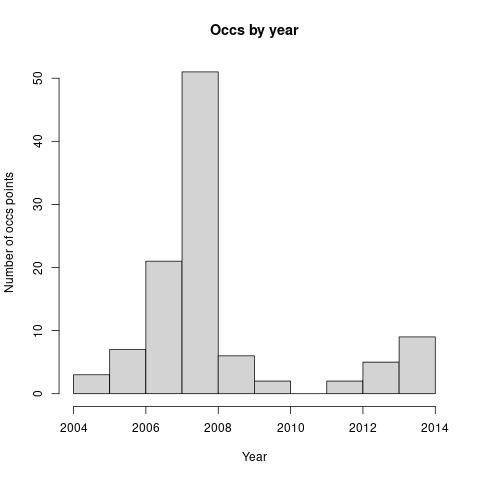

$sp_coords
    coords.x1 coords.x2
1     2695030  596691.5
2     2731964  580199.0
3     2560196  743269.0
4     2445596  687169.4
5     2665054  768351.6
6     2428617  838725.4
7     2823616  727897.0
8     2937848  669275.9
9     3026232  661918.1
10    2785399  995730.2
11    2786030  996134.0
12    2989276  899100.0
13    3329681  594993.1
14    3337959  590978.3
15    3270762  537666.1
16    3333355  584871.8
17    3267508  594632.6
18    3137512  589430.0
19    3138528  589549.5
20    3105321  620892.9
21    3120401  603730.9
22    3078158  653004.7
23    3080948  653643.1
24    3067150  583342.8
25    3065250  586698.4
26    3077410  578155.3
27    3077410  578155.3
28    3077410  578155.3
29    2787186 1228518.1
30    2988234  700830.8
31    2755966  594422.3
32    2577091  616915.6
33    2769805 1123393.9
34    2511769  775529.5
35    2536669  745912.5
36    3116879  623528.7
37    3082243  657296.5
38    3116879  623528.7
39    3114519  623464.3
40    3116879  623528.7
41   

In [11]:
#
ipython.magic("load_ext rpy2.ipython")
print(poncaloc)
ipython.magic("Rpush poncaloc")
#
string_test = """R test_sp <- sp_temporal_data(occs=poncaloc,longitude = "coords.x1",
                                               latitude = "coords.x2",sp_year_var="Year",
                                               layers_by_year_dir ="/shared_volume/forest_jEquihua_mar/",
                                               layers_ext = "*.tif$",reclass_year_data = T)
              """
ipython.magic(string_test)

#
test_sp = ipython.magic("Rget test_sp")
print(test_sp)
#

In [12]:
#
ipython.magic("load_ext rpy2.ipython")
print(poncaloc)
ipython.magic("Rpush test_sp")
ipython.magic("Rpush ponca_mask")
#

#Filtrar las localidades que se usaran mediante la mascara
string_filter = """R test_sp_mask <- occs_filter_by_mask(test_sp,ponca_mask)
                """
ipython.magic(string_filter)

#Limpia localidades duplicadas por anio

string_clean_test = """R test_sp_clean <- clean_dup_by_year(this_species = test_sp,
                                                            threshold = res(ponca_mask)[1])
                    """

ipython.magic(string_clean_test)

string_extract = """R e_test<-extract_by_year(this_species=test_sp_clean,layers_pattern="_mar")
                 """

ipython.magic(string_extract)


#
e_test = ipython.magic("Rget e_test")
print(e_test)
#

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
class       : SpatialPointsDataFrame 
features    : 106 
extent      : 2182204, 4032337, 456544, 1228518  (xmin, xmax, ymin, ymax)
crs         : +proj=lcc +lat_0=12 +lon_0=-102 +lat_1=17.5 +lat_2=29.5 +x_0=2500000 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
variables   : 4
names       :       Especie,     Latitud, Longitud, Year 
min values  : Panthera onca,     15.9675, -105.037, 2004 
max values  : Panthera onca, 23.05833056, -87.1511, 2014 

$sp_coords
   coords.x1 coords.x2
1    2182204  838174.6
2    2731964  580199.0
3    2989276  899100.0
4    2695030  596691.5
5    3329681  594993.1
6    3337959  590978.3
7    3270762  537666.1
8    3333355  584871.8
9    3267508  594632.6
10   3685129  504446.9
11   3137512  589430.0
12   3138528  589549.5
13   3105321  620892.9
14   3120401  603730.9
15   3078158  653004.7
16   2769805 1123393.9
17   2511769  775529.5
18   2536669  74

In [15]:
#
ipython.magic("load_ext rpy2.ipython")
print(e_test)
ipython.magic("Rpush e_test")
#

string_bestmodel = """R best_model_2004 <- find_best_model(this_species =e_test,
                                                           cor_threshold = 0.8,
                                                           ellipsoid_level = 0.975,
                                                           nvars_to_fit = 3,E = 0.05,
                                                           RandomPercent = 70,
                                                           NoOfIteration = 1000,
                                                           parallel = TRUE,
                                                           n_cores = 24,
                                                           plot3d = FALSE)
                   """

ipython.magic(string_bestmodel)

#
best_model_2004 = ipython.magic("Rget best_model_2004")
print(best_model_2004)
#

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The total number of occurrence records that will be used for model validation is: 26 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

The total number of models to be tested are:  680 ...

 Progress:                                                                  100%Progress:                                                                  100%Progress:                                                                  100%Progress:                                                                  100%Progress:                                                                  100%Progress:                                                                  100%Progress: ─                                                                100%Progress: ──                                                               100%Progress: ──                     

In [17]:
#
ipython.magic("load_ext rpy2.ipython")
print(best_model_2004)
ipython.magic("Rpush best_model_2004")
ipython.magic("Rpush ponca_mask")
#

results = "/shared_volume/new_model_parallel/19_05_2021_2/"

string_temporal_proj = """R temporal_projection(this_species = best_model_2004,
                                                save_dir = "/shared_volume/new_model_parallel/19_05_2021_2/",
                                                sp_mask = ponca_mask,
                                                crs_model = NULL,
                                                sp_name ="pan_onca",
                                                plot3d = FALSE)
                      """

if not os.path.exists(results):
    os.mkdir(results)
    
ipython.magic(string_temporal_proj)

#
string_temporal_proj = ipython.magic("Rget temporal_projection")
print(temporal_projection)
#

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
$sp_coords
   coords.x1 coords.x2
1    2182204  838174.6
2    2731964  580199.0
3    2989276  899100.0
4    2695030  596691.5
5    3329681  594993.1
6    3337959  590978.3
7    3270762  537666.1
8    3333355  584871.8
9    3267508  594632.6
10   3685129  504446.9
11   3137512  589430.0
12   3138528  589549.5
13   3105321  620892.9
14   3120401  603730.9
15   3078158  653004.7
16   2769805 1123393.9
17   2511769  775529.5
18   2536669  745912.5
19   3116879  623528.7
20   3082243  657296.5
21   3114519  623464.3
22   3154545  456544.0
23   3333356  584872.1
24   2255906  852191.5
25   2265160  842276.2
26   2256296  850485.5
27   2273595  818833.5
28   3985950 1114204.5
29   3983668 1113996.5
30   3981962 1110646.1
31   3983099 1110372.9
32   3984734 1110006.0
33   3988107 1113292.5
34   3986579 1110956.2
35   3988925 1110639.3
36   3990695 1114894.3
37   3990948 1112283.9
38   3982263 1112913.6


KeyError: "'string_temporal_proj' not found"